## Project Details
The tasks in this project are as follows:

* Data wrangling, which consists of:
    * Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    * Assessing data
    * Cleaning data
    * Storing, analyzing, and visualizing your wrangled data
    * Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

### 1. Gathering Data for this Project:

* The WeRateDogs Twitter archive. Download twitter_archive_enhanced.csv file.
* The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
* Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

### 1.1 The WeRateDogs Twitter archive

In [2]:
# Read Twitter Archive Data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### 1.2 Use Requests to get image predictions data

In [3]:
# Download by using Requests and save the data as image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [4]:
# Read Image Predictions Data
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

### 1.3 Use Twitter API and Save JSON

In [5]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [ ]:


#### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#### These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'xxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxx'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

#### NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#### df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#### change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#### NOTE TO REVIEWER: this student had mobile verification issues so the following
#### Twitter API code was sent to this student from a Udacity instructor
#### Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

### 2. Assessing Data for this Project

Key Points
Key points to keep in mind when data wrangling for this project:

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

Cleaning includes merging individual pieces of data according to the rules of tidy data.

The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

#### 2.1.1 Twitter archive data:

In [6]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [9]:
# we don't want retweets, so 181 retweets with retweeted_status_id shall removed
# also, 78 tweet replies need to be removed
twitter_archive.notnull().sum()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [10]:
#in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id shall be string, not float
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [11]:
# numerator of rating <10 shall be removed
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
#Denominator of not 10 shall be removed
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_archive.groupby('source').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
source,,,,,,,,,,,,,,,,
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",33,0,0,33,33,2,2,2,32,33,33,33,33,33,33,33
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2221,78,78,2221,2221,179,179,179,2163,2221,2221,2221,2221,2221,2221,2221
"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",91,0,0,91,91,0,0,0,91,91,91,91,91,91,91,91
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",11,0,0,11,11,0,0,0,11,11,11,11,11,11,11,11


In [14]:
pd.set_option('display.max_colwidth', 1000)
# check content in text column to see if there are any rating numerators or denominators contain decimals
twitter_archive[twitter_archive.text.str.contains(r'\d+\.\d+\/(?:\d+\.)?\d+|(?:\d+\.)\d+\/\d+\.\d+')]
# we can see that the rating_numerators are not correct for the text with decimals, we need to include the score
# on the left hand side of the decimal as well

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [15]:
pd.set_option('display.max_colwidth', 24)

#### 2.1.2 Assessment for Quality Issues

1. There are "<a href=" and other characters in the source column, they shall be removed

2. "+0000" in the timestamp column does not provide any value, shall be removed

3. tweet_id, in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id shall be string, not float.

4. In the text, there are ratings with decimal numbers, right now only numbers after the decimal points are captured and loaded into the rating_numerator column.

5. As we don’t want retweets and replies, “retweeted_status_timestamp” and other retweets and reply ralated columns becomes irrelevant , this column shall be removed.

6. Rows with 'None' in the name column has no dog name in the text




#### 2.1.3 Assessment for Tidiness Issues

1. There are 181 retweets and 78 tweet replies, those rows of entries shall be removed to ensure no duplication of the same tweet. This is following the rule of tidy data, i.e. Each observation forms a row. Therefore, we want each row to only represent an unique entry. 

2. Dog types are currently in the form of wide columns, i.e. "doggo", "floofer", "pupper", and "puppo" columns, we shall combine these dog types into one single column as they are one type of variables. 


#### 2.2.1 Image prediction data:

In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.co...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.co...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.co...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.co...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.co...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [19]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### 2.2.2 Assessment for Quality Issues

7. Entries with a False “P1_dog” value will be removed, as the model has no confidence to determine the type of dog. 

8. “P1_dog” column will be removed as it does not provide information after the False “P1_dog” entries are removed.


#### 2.3.1 Twitter API's JSON file (Retweet vs. Favorite Count Data)

In [21]:
# saving json data to the dataframe
tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        t_dict = {}
        t_json = json.loads(line)
        
        #to handle exceptions, as some of id is na
        try:
            t_dict['tweet_id'] = t_json['extended_entities']['media'][0]['id']
        except:
            t_dict['tweet_id'] = 'na'

        t_dict['retweet_count'] = t_json['retweet_count']
        t_dict['favorite_count'] = t_json['favorite_count']
        
        tweets_list.append(t_dict)

In [22]:
tweets_df = pd.DataFrame(tweets_list)

In [23]:
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,37772,8230,892420639486877696
1,32451,6081,892177413194625024
2,24435,4024,891815175371796480
3,41106,8386,891689552724799489
4,39314,9087,891327551943041024


In [24]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
tweet_id          2339 non-null object
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [25]:
tweets_df.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

### 3. Cleaning Data for this Project

#### 3.1 Twitter Archive data:

In [26]:
twitter_archive_cleaned = twitter_archive.copy()

#### Tidiness Issues:

Recap:

1. There are 181 retweets and 78 tweet replies, those rows of entries shall be removed to ensure no duplication of the same tweet. This is following the rule of tidy data, i.e. Each observation forms a row. Therefore, we want each row to only represent an unique entry.

2. Dog types are currently in the form of wide columns, i.e. "doggo", "floofer", "pupper", and "puppo" columns, we shall combine these dog types into one single column as they are one type of variables.

### Define: 1. 
There are 181 retweets and 78 tweet replies, those rows of entries shall be removed to ensure no duplication of the same tweet. 
This is following the rule of tidy data, i.e. Each observation forms a row. Therefore, we want each row to only represent an unique entry.

### Code:

In [27]:
twitter_archive_cleaned.drop(twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_id.notnull()].index, inplace = True)

### Test:

In [28]:
# Test:
twitter_archive_cleaned.retweeted_status_id.notnull().sum()

0

### Define: 2.
Dog types are currently in the form of wide columns, i.e. "doggo", "floofer", "pupper", and "puppo" columns, 
we shall combine these dog types into one single column as they are one type of variables.

### Code:

In [29]:
# First, use lambda to join all types into one value

twitter_archive_cleaned['dogStage'] = twitter_archive_cleaned[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

# single stage
twitter_archive_cleaned['dogStage'].replace("NoneNoneNoneNone","None ", inplace=True)
twitter_archive_cleaned['dogStage'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_archive_cleaned['dogStage'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_archive_cleaned['dogStage'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_archive_cleaned['dogStage'].replace("NoneNoneNonepuppo","puppo", inplace=True) 

# mix stage
twitter_archive_cleaned['dogStage'].replace("doggoNonepupperNone","multiple", inplace=True) 
twitter_archive_cleaned['dogStage'].replace("doggoNoneNonepuppo","multiple", inplace=True) 
twitter_archive_cleaned['dogStage'].replace("doggoflooferNoneNone","multiple", inplace=True)


### Test

In [30]:
# Test:
twitter_archive_cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogStage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 ...,"<a href=""http://twit...",This is Phineas. He'...,NaN,NaN,NaN,https://twitter.com/...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 ...,"<a href=""http://twit...",This is Tilly. She's...,NaN,NaN,NaN,https://twitter.com/...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 ...,"<a href=""http://twit...",This is Archie. He i...,NaN,NaN,NaN,https://twitter.com/...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 ...,"<a href=""http://twit...",This is Darla. She c...,NaN,NaN,NaN,https://twitter.com/...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 ...,"<a href=""http://twit...",This is Franklin. He...,NaN,NaN,NaN,https://twitter.com/...,12,10,Franklin,None,None,None,None,None


In [31]:
# Test:
twitter_archive_cleaned.dogStage.value_counts()

None        1831
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dogStage, dtype: int64

In [32]:
# To drop old stage columns, they are no longer useful
ToDrop = ['doggo','floofer','pupper','puppo',]
twitter_archive_cleaned.drop(ToDrop,inplace=True,axis=1)

In [33]:
twitter_archive_cleaned.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dogStage'],
      dtype='object')

#### Quality Issues:

Recap all the quality issues:
1. There are "<a href=" and other characters in the source column, they shall be removed

2. "+0000" in the timestamp column does not provide any value, shall be removed

3. tweet_id, in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id shall be string, not float.

4. In the text, there are ratings with decimal numbers, right now only numbers after the decimal points are captured and loaded into the rating_numerator column.

5. As we don’t want retweets and replies, “retweeted_status_timestamp” and other retweets and reply ralated columns becomes irrelevant , this column shall be removed.

6. Rows with 'None' in the name column has no dog name in the text



### Define: 1. Remove extra parts of urls in source column using split() function

### Code

In [34]:
twitter_archive_cleaned.source = twitter_archive_cleaned.source.str.replace(r'<[^>]*>', '')

### Test:

In [35]:
twitter_archive_cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogStage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 ...,Twitter for iPhone,This is Phineas. He'...,NaN,NaN,NaN,https://twitter.com/...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 ...,Twitter for iPhone,This is Tilly. She's...,NaN,NaN,NaN,https://twitter.com/...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 ...,Twitter for iPhone,This is Archie. He i...,NaN,NaN,NaN,https://twitter.com/...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 ...,Twitter for iPhone,This is Darla. She c...,NaN,NaN,NaN,https://twitter.com/...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 ...,Twitter for iPhone,This is Franklin. He...,NaN,NaN,NaN,https://twitter.com/...,12,10,Franklin,None


### Define: 2. "+0000" in the timestamp column does not provide any value, shall be removed

### Code:

In [36]:
twitter_archive_cleaned.timestamp=twitter_archive_cleaned.timestamp.str.rstrip('+0000')

### Test:

In [37]:
# Test:
twitter_archive_cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dogStage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He'...,NaN,NaN,NaN,https://twitter.com/...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's...,NaN,NaN,NaN,https://twitter.com/...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He i...,NaN,NaN,NaN,https://twitter.com/...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She c...,NaN,NaN,NaN,https://twitter.com/...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He...,NaN,NaN,NaN,https://twitter.com/...,12,10,Franklin,None


### Define: 3.tweet_id, in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id shall be string, not float.

### Code:

In [38]:
# Code:
ListOfID= ['tweet_id', 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']
twitter_archive_cleaned[ListOfID] = twitter_archive_cleaned[ListOfID].astype(str)

In [39]:
# Test:
twitter_archive_cleaned.dtypes

tweet_id                      object
in_reply_to_status_id         object
in_reply_to_user_id           object
timestamp                     object
source                        object
text                          object
retweeted_status_id           object
retweeted_status_user_id      object
retweeted_status_timestamp    object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
dogStage                      object
dtype: object

### Define: 4. In the text, there are ratings with decimal numbers, right now only numbers after the decimal points are captured and loaded into the rating_numerator column. 
### we can see that the rating_numerators are not correct for the text with decimals, we need to include the score on the left hand side of the decimal as well. So let's re-extract the rating numerator with the correct regular expression

### Code:

In [40]:
twitter_archive_cleaned.rating_numerator = twitter_archive_cleaned.text.str.extract(r'((?:\d+\.)?\d+)\/\d+',
                                                                                expand=True).astype('float')

### Test:

In [41]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dogStage                      2175 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 254.9+ KB


### Define: 5. all columns relate to retweets and replies will be removed

### Code:

In [42]:
ToDrop = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twitter_archive_cleaned.drop(ToDrop,inplace=True,axis=1)

### Test:

In [43]:
#Test:
twitter_archive_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He'...,https://twitter.com/...,13.0,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's...,https://twitter.com/...,13.0,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He i...,https://twitter.com/...,12.0,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She c...,https://twitter.com/...,13.0,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He...,https://twitter.com/...,12.0,10,Franklin,None


### Define: 6. Rows with 'None' in the name column has no dog name in the text

### Code:

In [44]:
# Code:
twitter_archive_cleaned.name = twitter_archive_cleaned.name.replace('None', np.nan)

### Test:

In [45]:
# Test:
twitter_archive_cleaned.query('name == "None"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage


#### 3.2 Image Prediction Data:

In [46]:
image_preds_cleaned = image_predictions.copy()

Quality Issues:

7. Entries with a False “P1_dog” value will be removed, as the model has no confidence to determine the type of dog.

8. “P1_dog” column will be removed as it does not provide information after the False “P1_dog” entries are removed.

In [47]:
image_preds_cleaned.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

### Define: 7. Entries with a False “P1_dog” value will be removed, as the model has no confidence to determine the type of dog.

### Code:

In [48]:

image_preds_cleaned.drop(image_preds_cleaned[image_preds_cleaned.p1_dog == False].index, inplace=True)

### Test:

In [49]:
# Test:
image_preds_cleaned.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

### Define: 8. “P1_dog” column will be removed as it does not provide information after the False “P1_dog” entries are removed.

### Code:

In [50]:
Drop_C = ['p1_dog']
image_preds_cleaned.drop(Drop_C, inplace=True, axis=1)

### Test:

In [51]:
# Test
image_preds_cleaned.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.co...,1,Welsh_springer_spaniel,0.465074,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.co...,1,redbone,0.506826,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.co...,1,German_shepherd,0.596461,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.co...,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.co...,1,miniature_pinscher,0.560311,Rottweiler,0.243682,True,Doberman,0.154629,True


In [52]:
image_preds_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(2), float64(3), int64(2), object(4)
memory usage: 122.7+ KB


In [53]:
image_preds_cleaned['tweet_id'] = image_preds_cleaned['tweet_id'].astype(str)

In [54]:
image_preds_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1532 non-null object
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(2), float64(3), int64(1), object(5)
memory usage: 122.7+ KB


#### 3.3 Retweet vs Fav. Data

In [55]:
tweets_df_cleaned=tweets_df.copy()

In [56]:
tweets_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
tweet_id          2339 non-null object
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [57]:
tweets_df_cleaned.describe()

,favorite_count,retweet_count
count,2339.000000,2339.000000
mean,7896.887131,2901.826849
std,12240.565834,4893.130499
min,0.000000,0.000000
25%,1368.000000,583.500000
50%,3436.000000,1353.000000
75%,9671.500000,3382.500000
max,163095.000000,82936.000000


Quality and Tidiness seem Ok

### 4. Storing, Analyzing, and Visualizing Data for this Project

#### 4.1 Combining and Storing

In [58]:
twitter_archive_master = pd.merge(twitter_archive_cleaned,image_preds_cleaned,on = 'tweet_id' ,how = 'left')
twitter_archive_master = pd.merge(twitter_archive_master,tweets_df_cleaned,on = 'tweet_id' ,how = 'left')

In [59]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage,jpg_url,...,p1,p1_conf,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He'...,https://twitter.com/...,13.0,10,Phineas,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's...,https://twitter.com/...,13.0,10,Tilly,None,https://pbs.twimg.co...,...,Chihuahua,0.323581,Pekinese,0.090647,True,papillon,0.068957,True,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He i...,https://twitter.com/...,12.0,10,Archie,None,https://pbs.twimg.co...,...,Chihuahua,0.716012,malamute,0.078253,True,kelpie,0.031379,True,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She c...,https://twitter.com/...,13.0,10,Darla,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He...,https://twitter.com/...,12.0,10,Franklin,None,https://pbs.twimg.co...,...,basset,0.555712,English_springer,0.225770,True,German_short-haired_...,0.175219,True,NaN,NaN


In [60]:
twitter_archive_master.to_csv('twitter_archive_master.csv')
twitter_archive_cleaned.to_csv('twitter_archive_cleaned.csv')
image_preds_cleaned.to_csv('image_preds_cleaned.csv')
tweets_df_cleaned.to_csv('tweets_df_cleaned.csv')

#### 4.2 Analyzing

In [61]:
twitter_archive_master.dogStage.value_counts()

None        1831
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dogStage, dtype: int64

In [62]:
import seaborn as sns

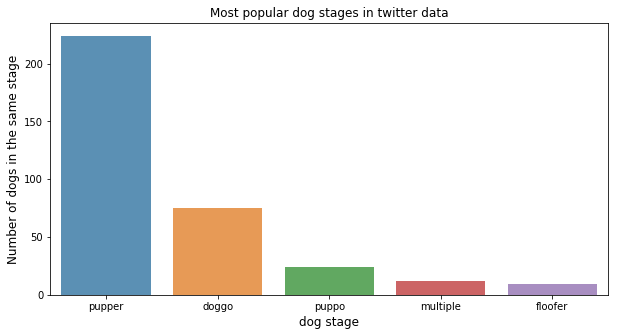

In [63]:
# Plotting a bar graph of the number of ooccurrence of dog in each dog stage
dog_count  = twitter_archive_master.dogStage.value_counts()
dog_count = dog_count[1:]
plt.figure(figsize=(10,5))
sns.barplot(dog_count.index, dog_count.values, alpha=0.8)
plt.title('Most popular dog stages in twitter data')
plt.ylabel('Number of dogs in the same stage', fontsize=12)
plt.xlabel('dog stage', fontsize=12)
plt.show()

# Pupper is the most popular stage of dogs

#### Insight 1: Pupper is the most popular dog type

In [64]:
valueCounts=twitter_archive_master.p1.value_counts().reset_index()
valueCounts.rename(columns={'p1':'counts','index':'type'},inplace=True)

In [65]:
#Create a dogRating which is numerator/denominator*10 (score out of 10)
twitter_archive_master['dogRating']=twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']*10

In [66]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogStage,jpg_url,...,p1_conf,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dogRating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He'...,https://twitter.com/...,13.0,10,Phineas,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's...,https://twitter.com/...,13.0,10,Tilly,None,https://pbs.twimg.co...,...,0.323581,Pekinese,0.090647,True,papillon,0.068957,True,NaN,NaN,13.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He i...,https://twitter.com/...,12.0,10,Archie,None,https://pbs.twimg.co...,...,0.716012,malamute,0.078253,True,kelpie,0.031379,True,NaN,NaN,12.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She c...,https://twitter.com/...,13.0,10,Darla,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He...,https://twitter.com/...,12.0,10,Franklin,None,https://pbs.twimg.co...,...,0.555712,English_springer,0.225770,True,German_short-haired_...,0.175219,True,NaN,NaN,12.0


In [67]:
rating=twitter_archive_master.groupby('p1').dogRating.mean().reset_index()
rating.sort_values('dogRating', ascending=False)
rating.rename(columns={'p1':'type'},inplace=True)

In [68]:
valueCounts.head()

,type,counts
0,golden_retriever,139
1,Labrador_retriever,95
2,Pembroke,88
3,Chihuahua,79
4,pug,54


In [69]:
valueCounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
type      111 non-null object
counts    111 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [70]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
type         111 non-null object
dogRating    111 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [71]:
rate_table=pd.merge(valueCounts,rating)

In [72]:
# Golden Retriever is the most popular breed
rate_table.head(20)

,type,counts,dogRating
0,golden_retriever,139,11.755162
1,Labrador_retriever,95,11.126316
2,Pembroke,88,11.443182
3,Chihuahua,79,10.708861
4,pug,54,10.240741
5,chow,41,11.609756
6,Samoyed,40,11.700000
7,toy_poodle,38,11.105263
8,Pomeranian,38,11.151316
9,malamute,29,10.896552


#### Insight 2: Golden Retriever is the most popular breed with 139 counts

In [73]:
# Golden Retriever has the highest rating among top 20 most popular breeds 
rate_table[rate_table['counts']>20].sort_values('dogRating', ascending=False)

,type,counts,dogRating
0,golden_retriever,139,11.755162
6,Samoyed,40,11.700000
5,chow,41,11.609756
2,Pembroke,88,11.443182
10,cocker_spaniel,27,11.296296
11,French_bulldog,26,11.269231
8,Pomeranian,38,11.151316
1,Labrador_retriever,95,11.126316
7,toy_poodle,38,11.105263
9,malamute,29,10.896552


#### Insight 3: Golden Retriever has the highest rating among top 20 most popular breeds, with a top score of 11.76

Reference:
* https://stackoverflow.com/questions/34670374/concat-two-columns-with-pandas
* https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/
* https://github.com/S-Tabor/udacity-data-wrangling-project
* https://github.com/CICIFLY/Data-Analytics-Projects
* https://stackoverflow.com/questions/48614158/read-json-file-as-pandas-dataframe
* https://pbpython.com/pandas-list-dict.html
* http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
* https://stackoverflow.com/questions/34670374/concat-two-columns-with-pandas
* https://github.com/xhlow/dand-t2-p3-data-wrangling/blob/master/wrangle_act.ipynb